In [1]:
import os
import pickle

import torch
import matplotlib; matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from sensitivity.utils import bin_jac_norms

%matplotlib inline

In [2]:
dir1_name = '../results/sensitivity/2024-07-27-14-46-51/i=200'
dir2_name = '../results/sensitivity/2024-07-27-14-46-51/i=200 copy'

with open(f'{dir1_name}/commute_times.pkl', 'rb') as f:
    commute_times = pickle.load(f)

BIN_SIZE = 40.
binned_commute_times = torch.round(commute_times/BIN_SIZE) * BIN_SIZE
binned_commute_times = binned_commute_times.flatten()
x_ct = binned_commute_times.unique()

with open(f'{dir1_name}/shortest_distances.pkl', 'rb') as f:
    shortest_distances = pickle.load(f)

x_sd = shortest_distances.unique()

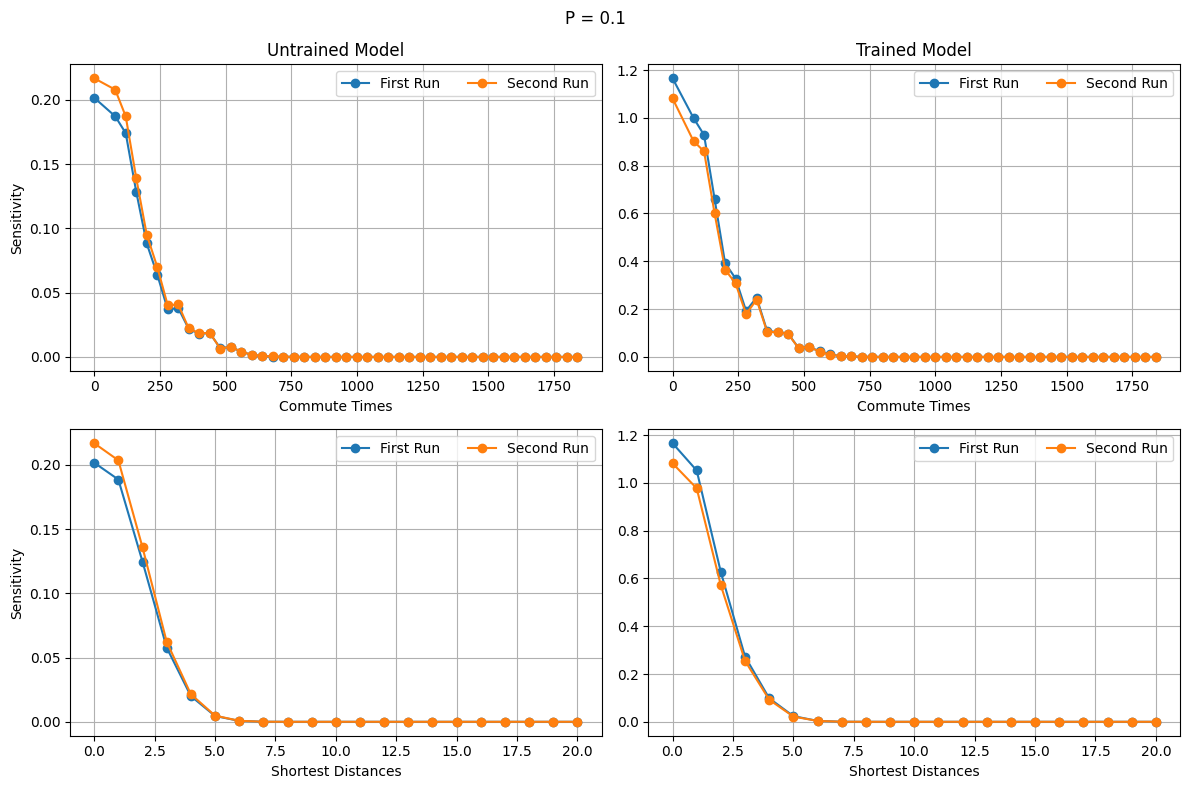

In [5]:
P = 0.1

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f'q = {P}')
axs[0, 0].set_title('Untrained Model')
axs[0, 1].set_title('Trained Model')
axs[0, 0].set_ylabel('Sensitivity')
axs[1, 0].set_ylabel('Sensitivity')

for i, trained in enumerate(('untrained', 'trained')):

    for run, dir_name in zip(('First', 'Second'), (dir1_name, dir2_name)):

        with open(f'{dir_name}/jac-norms/{trained}/p={int(P*100)}.pkl', 'rb') as f:
            jac_norms = pickle.load(f)
        
        y_ct = bin_jac_norms(jac_norms, binned_commute_times, x_ct)
        axs[0, i].plot(x_ct, y_ct, marker='o', label=f'{run} Run')
        
        y_sd = bin_jac_norms(jac_norms, shortest_distances, x_sd)
        axs[1, i].plot(x_sd, y_sd, marker='o', label=f'{run} Run')
    
    axs[0, i].set_xlabel('Commute Times')
    axs[1, i].set_xlabel('Shortest Distances')
    
    for j in range(2):

        axs[j, i].legend(ncols=4)
        axs[j, i].grid()

fig.tight_layout()
plt.show()